### Project 1 - Mercedes-Benz Greener Manufacturing

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

#### Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with the crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

#### Following actions should be performed:
* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using xgboost

In [48]:
# Import necessary libraries & conditions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

In [49]:
# Import the train and test datasets, and print their shape

train_data=pd.read_csv\
(r"D:\Simplilearn\03 Machine Learning\Assignment\train.csv")

test_data=pd.read_csv\
(r"D:\Simplilearn\03 Machine Learning\Assignment\test.csv")

print("Train shape : ",train_data.shape)
print("Test shape : ", test_data.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


In [50]:
# train_data has an additional feature/column 'y', which must be the time that a particular car spends on the test bench
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [51]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


#### Dependent Variable Analysis

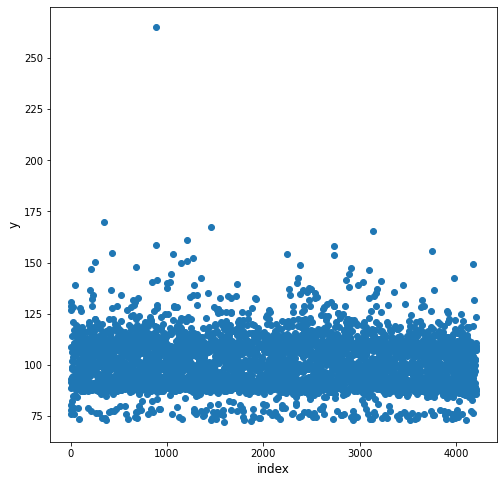

In [52]:
# Let's take a closer look at dependent variable 'y' with some plots
plt.figure(figsize=(8,8))
plt.scatter(range(train_data.shape[0]),train_data.y.values) #np.sort(train_data.y.values)
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

In [53]:
# There is a single observation that is clearly an outlier. Let's remove that
train_data = train_data[train_data['y'].between(0, 200)]
train_data.shape

(4208, 378)

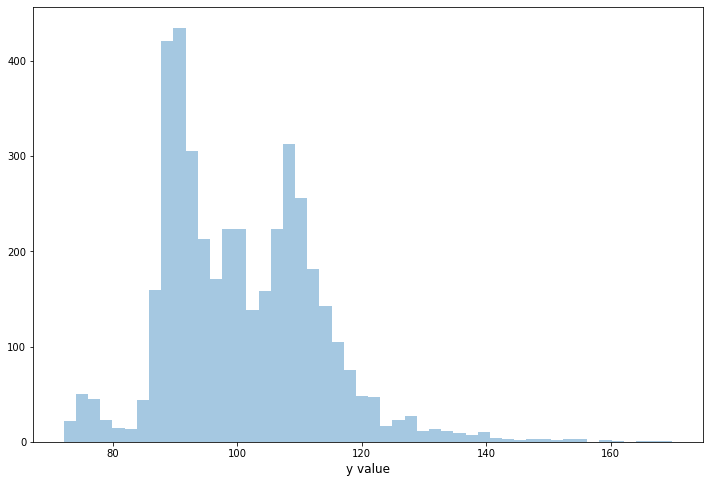

In [54]:
# The distribution plot of y shows some right-skewedness:
plt.figure(figsize=(12,8))
sns.distplot(train_data.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

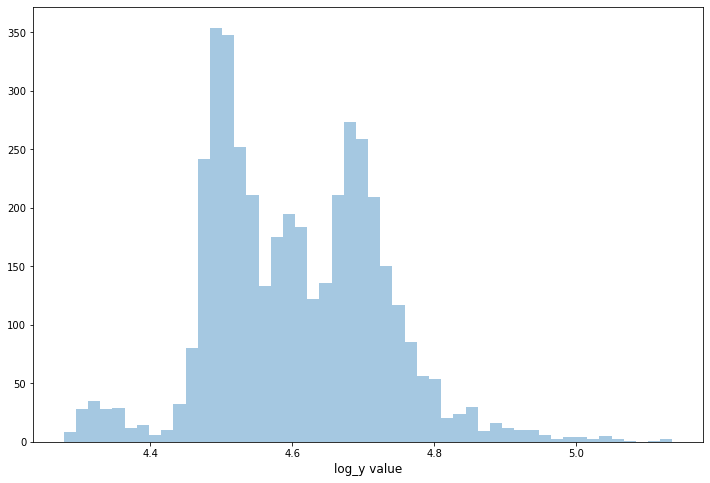

In [55]:
# Let's try to normalize it with a log function:
train_data_y = np.log(train_data.y)

plt.figure(figsize=(12,8))
sns.distplot(train_data_y, bins=50, kde=False)
plt.xlabel('log_y value', fontsize=12)
plt.show()

# The results still shows some skew, but overall it is doing better

In [56]:
# Thus, time to replace the original y values with y_log values.

#series to df
train_data_y=pd.DataFrame(train_data_y)

#since the length of the column matches we can replace it directly:
train_data['y'] = train_data_y['y'].values
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,4.873746,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,4.483341,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,4.334149,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,4.389747,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,4.356965,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


#### Independent Variable Analysis

In [57]:
# Now lets look at the independent variables too:
print('Train data info:')
train_data.info()
print('\nTest data info:')
test_data.info()

print('\nThere are the following datatypes present: (1) float64, (369) int64, and (8) objects in both test and train data')
print("Earlier, we identified a feature 'y' in train_data, which can be seen to be a float. This is the (1) float64 item")

Train data info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4208 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.2+ MB

Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB

There are the following datatypes present: (1) float64, (369) int64, and (8) objects in both test and train data
Earlier, we identified a feature 'y' in train_data, which can be seen to be a float. This is the (1) float64 item


In [58]:
train_data.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4208.000000,4208.000000,4208.000000,4208.0,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,...,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000
mean,4206.539686,4.604079,0.013308,0.0,0.075095,0.057985,0.428232,0.000475,0.002614,0.007605,...,0.318916,0.057272,0.314876,0.020675,0.009506,0.008080,0.007605,0.001663,0.000475,0.001426
std,2437.609011,0.120742,0.114604,0.0,0.263576,0.233742,0.494881,0.021798,0.051067,0.086882,...,0.466112,0.232389,0.464522,0.142310,0.097044,0.089535,0.086882,0.040757,0.021798,0.037738
min,0.000000,4.278193,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.750000,4.508852,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.500000,4.596634,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.250000,4.691440,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,5.135269,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
test_data.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### If for any column(s), the variance is equal to zero, then you need to remove those variable(s)

In [60]:
# first we calculate the variance of all columns (exluding of course the dtype object columns):
var_df = pd.DataFrame(train_data.var(),columns=['Variance'])
var_df

,Variance
ID,5.941938e+06
y,1.457869e-02
X10,1.313400e-02
X11,0.000000e+00
X12,6.947230e-02
X13,5.463554e-02
X14,2.449075e-01
X15,4.751722e-04
X16,2.607855e-03
X17,7.548527e-03


In [61]:
# columns with variance = 0
var_df[var_df.Variance==0]

,Variance
X11,0.0
X93,0.0
X107,0.0
X233,0.0
X235,0.0
X268,0.0
X289,0.0
X290,0.0
X293,0.0
X297,0.0


In [62]:
train_data.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], 
                axis = 1, inplace=True)

In [63]:
# let's also remove the same columns from the test set 
# This must be done so that there is no information leakage, and to be able to run the model (matching features in train/test)
test_data.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], 
               axis = 1, inplace=True)

### Check for null and unique values for test and train sets

In [64]:
train_data.isnull().sum().any()

False

In [65]:
test_data.isnull().sum().any()

False

In [66]:
print("No null values are observed in both train and test datasets")

No null values are observed in both train and test datasets


In [67]:
#by default is df.nunique(axis=0) for columns
# >2 because it was observed that everything other feature had just 2 unique values, either 1 or 0 (binary)
train_data_uq = pd.DataFrame(train_data.nunique(),columns=['uniqueCount'])
train_data_uq[train_data_uq.uniqueCount>2]

,uniqueCount
ID,4208
y,2544
X0,47
X1,27
X2,44
X3,7
X4,4
X5,29
X6,12
X8,25


In [68]:
test_data_uq = pd.DataFrame(test_data.nunique(),columns=['uniqueCount'])
test_data_uq[test_data_uq.uniqueCount>2]

,uniqueCount
ID,4209
X0,49
X1,27
X2,45
X3,7
X4,4
X5,32
X6,12
X8,25


In [69]:
print("A check for unique values shows that 'ID' is 100% unique. \nIt can therefore be removed later during modelling")

A check for unique values shows that 'ID' is 100% unique. 
It can therefore be removed later during modelling


### Apply label encoder

In [70]:
from sklearn.preprocessing import LabelEncoder

#label encoder should apply only to the dtype objects, in order to convert them into numerical values
train_data.describe(include='object')
print("The dtype 'objects'are identified to be within columns X0 to X8, except for X7")

The dtype 'objects'are identified to be within columns X0 to X8, except for X7


In [71]:
# for loop to run label encoder on training data
for i in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = LabelEncoder()
        lbl.fit(list(train_data[i].values)) 
        train_data[i] = lbl.transform(list(train_data[i].values))
        
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,4.873746,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,4.483341,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,4.334149,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,4.389747,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,4.356965,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# do the same for test data
for j in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = LabelEncoder()
        lbl.fit(list(test_data[j].values)) 
        test_data[j] = lbl.transform(list(test_data[j].values))
        
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


In [73]:
# all features are now dtype int64
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 365 entries, ID to X385
dtypes: int32(8), int64(357)
memory usage: 11.6 MB


### Perform dimensionality reduction

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

# Now we split out variable y from the features
train_data_x = train_data.drop(columns={'y','ID'})
train_data_y = train_data.y
test_data_x = test_data.drop(columns={'ID'})

print("Current train features (x) shape : ",train_data_x.shape)
print("Current train target (y) shape : ",train_data_y.shape)
print("Current test features (x) shape : ", test_data_x.shape)

Current train features (x) shape :  (4208, 364)
Current train target (y) shape :  (4208,)
Current test features (x) shape :  (4209, 364)


In [75]:
# First we fit the scaler on the training set only. Presumably to carry the fit over to the test data
# Scaling the data is necessary for PCA
scaler.fit(train_data_x)

# Apply scaling to both the training set and the test set.
train_data_x_scaled = scaler.transform(train_data_x)
test_data_x_scaled = scaler.transform(test_data_x)

# Note: scaling for binary variables is hotly debated, but can be done:
# https://stats.stackexchange.com/questions/16331/doing-principal-component-analysis-or-factor-analysis-on-binary-data/16335#16335

In [76]:
# Make an instance of the PCA model. Typically, the explained variance should be between 95-99%
# However, based on initial test runs, 95% gave only 6 components at the end
# This appeared to have made the subsequent xgboost become overfitted.
# So lets set it as 99% for now, so n_components=0.99
pca = PCA(.99)

# Then fit it on the training set only
pca.fit(train_data_x)

# And apply the mapping to both train and test data:
final_train_x = pca.transform(train_data_x_scaled) #note: the previous step can be skipped if we use pca.fit_transform 
final_test_x = pca.transform(test_data_x_scaled)

In [77]:
print("PCA has reduced the number of features to ", pca.n_components_ ,
      "with the train & test features having now a shape of: ")

print("Final Train set shape : ",final_train_x.shape)
print("Final Test set shape : ", final_test_x.shape)

PCA has reduced the number of features to  27 with the train & test features having now a shape of: 
Final Train set shape :  (4208, 27)
Final Test set shape :  (4209, 27)


### Predict your test_df values using xgboost

In [78]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
# final_train_x
# train_data_y
# final_test_x

In [79]:
# training using xgboost. We use the word 'valid' since its a secondary 'test' dataset from the original train set
x_train, x_valid, y_train, y_valid = train_test_split(
        final_train_x, 
        train_data_y, test_size=0.20, 
        random_state=42)


d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(final_test_x)

# note: https://stats.stackexchange.com/questions/443259/how-to-avoid-overfitting-in-xgboost-model
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 2
params['gamma'] = 0.02
params['min_child_weight'] = 100

# found on kaggle and github:
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

#notes: reduced early stopping rounds to reduce overfit
clf = xgb.train(params, d_train, 
                1000, watchlist, early_stopping_rounds=3, 
                feval=xgb_r2_score, maximize=True, verbose_eval=10)

[11:47:35] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:4.02444	train-r2:-1117.13924	valid-rmse:4.02136	valid-r2:-1082.24052
[10]	train-rmse:3.28919	train-r2:-745.90148	valid-rmse:3.28613	valid-r2:-722.34817
[20]	train-rmse:2.68853	train-r2:-498.01721	valid-rmse:2.68589	valid-r2:-482.23118
[30]	train-rmse:2.19780	train-r2:-332.47555	valid-rmse:2.19568	valid-r2:-321.93476
[40]	train-rmse:1.79693	train-r2:-221.91925	valid-rmse:1.79525	valid-r2:-214.88836
[50]	train-rmse:1.46949	train-r2:-148.07976	valid-rmse:1.46830	valid-r2:-143.41282
[60]	train-rmse:1.20208	train-r2:-98.75927	valid-rmse:1.20133	valid-r2:-95.67191
[70]	train-rmse:0.98377	train-r2:-65.81535	valid-rmse:0.98349	valid-r2:-63.79171
[80]	train-rmse:0.80563	train-r2:-43.80849	valid-rmse:0.80575	valid-r2:-42.48864
[90]	train-rmse:0.66035	train-r2:-29.10478	valid-rmse:0.66081	valid-r2:-28.25053
[100]	train-rmse:0.541

In [80]:
print("When xgboost parameters are: \n\nparams['objective'] = 'reg:linear'\nparams['eta'] = 0.02\nparams['max_depth'] = 4 \n\nR2 results from indicated an overfitting: \ntrain-R2 = 0.63787\nvalid-R2 = 0.43186 ")

When xgboost parameters are: 

params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4 

R2 results from indicated an overfitting: 
train-R2 = 0.63787
valid-R2 = 0.43186 


In [81]:
print("However when the parameters were adjusted to: \n\nparams['objective'] = 'reg:linear'\nparams['eta'] = 0.02\nparams['max_depth'] = 4\nparams['gamma']=0.02\nparams['min_child_weight']=100 \n\nR2 results indicated a much better fit of: \ntrain-R2 = 0.61674\nvalid-R2 = 0.55753 ")

However when the parameters were adjusted to: 

params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4
params['gamma']=0.02
params['min_child_weight']=100 

R2 results indicated a much better fit of: 
train-R2 = 0.61674
valid-R2 = 0.55753 


In [82]:
# predict test_df values using xgboost
p_test = clf.predict(d_test)

sub = pd.DataFrame()
sub['ID'] = test_data['ID'].values
sub['y'] = p_test

sub.head(100)

,ID,y
0,1,4.358309
1,2,4.544764
2,3,4.378325
3,4,4.342152
4,5,4.668184
5,8,4.524406
6,10,4.676398
7,11,4.560828
8,12,4.752727
9,14,4.554935


In [83]:
# Reverting the log conversion done earlier for final predicted test bench time results
sub_no_log = pd.DataFrame(np.exp(sub.y))
sub_no_log.head(100)

,y
0,78.124931
1,94.138168
2,79.704453
3,76.872803
4,106.504135
5,92.241158
6,107.382561
7,95.662674
8,115.899918
9,95.100616


#### Miscellaneous Notes

In [84]:
# Notes for standard scaler and PCA section:

# .fit()is used in the Supervised learning having two object/parameter (x,y) to fit model and make model to run, 
# where we know that what we are going to predict

# .fit_transform() is used in Unsupervised Learning having one object/parameter(x), where we don't know, what we 
# are going to predict.

In [85]:
# Notes for independent variable analysis section (an alternative method to view categorical variables):

# First:
# dtype_data=train_data.dtypes.reset_index()
# dtype_data.columns = ["Count", "Column Type"]
# dtype_data.groupby("Column Type").aggregate('count').reset_index()

# Then:
# dtype_data.loc[:10,:]